# DATS 6103 Project 2

## Analysis the relationship between suicide number with the life expectancy and Happiness score and per GDP

## Choice topic reason:
These days I saw a news about that a PHD student suicide in the university and also have some news show that there are lots of people who worked in the internet company suicide. I feel sad for them. In my opinion life should be interesting and we should not give up easily. I think this situation will not only happen in one country or region, so I want to use data to learn more information.


# Data Source:
### 1. Suicide Rate : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
### 2. Life Expectancy : https://www.kaggle.com/kumarajarshi/life-expectancy-who
### 3. Total GDP : https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
### 4. Total Population : https://data.worldbank.org/indicator/SP.POP.TOTL
### 5. World Happiness : https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

### GitHub : https://github.com/JT-Sun/DATS_6103

# Step 1: Importing packages


In [58]:
!pip install chart_studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as ml
import seaborn as sns
import plotly
import chart_studio.plotly as py
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [59]:
py.sign_in('javissun', 'YSIBoSD0EbYH5Qd1d1d7')
print(plotly.__version__)

4.11.0


## Step 2: Reading sucidie data and clearning the data

In [60]:
sd = pd.read_csv('suicide.csv', index_col = 0, encoding='latin')
sd.head(10)

year     sex          age  suicides_no  population  \
country                                                       
Albania  1987    male  15-24 years           21      312900   
Albania  1987    male  35-54 years           16      308000   
Albania  1987  female  15-24 years           14      289700   
Albania  1987    male    75+ years            1       21800   
Albania  1987    male  25-34 years            9      274300   
Albania  1987  female    75+ years            1       35600   
Albania  1987  female  35-54 years            6      278800   
Albania  1987  female  25-34 years            4      257200   
Albania  1987    male  55-74 years            1      137500   
Albania  1987  female   5-14 years            0      311000   

         suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
country                                                                    
Albania               6.71  Albania1987           NaN     -2,138,342,396   
Albania               5.19  Albania1987           NaN     -2,138,342,396   
Albania               4.83  Albania1987           NaN     -2,138,342,396   
Albania               4.59  Albania1987           NaN     -2,138,342,396   
Albania               3.28  Albania1987           NaN     -2,138,342,396   
Albania               2.81  Albania1987           NaN     -2,138,342,396   
Albania               2.15  Albania1987           NaN     -2,138,342,396   
Albania               1.56  Albania1987           NaN     -2,138,342,396   
Albania               0.73  Albania1987           NaN     -2,138,342,396   
Albania               0.00  Albania1987           NaN     -2,138,342,396   

         gdp_per_capita ($)       generation  
country                                       
Albania                 796     Generation X  
Albania                 796           Silent  
Albania                 796     Generation X  
Albania                 796  G.I. Generation  
Albania                 796          Boomers  
Albania                 796  G.I. Generation  
Albania                 796           Silent  
Albania                 796          Boomers  
Albania                 796  G.I. Generation  
Albania                 796     Generation X

In [61]:
#Group data by age gender of each year
gsd= pd.DataFrame(sd.groupby(['age','sex','year'])['suicides_no'].sum().unstack())
gsd = gsd.fillna(0)
gsd

year                   1985     1986     1987     1988     1989     1990  \
age         sex                                                            
15-24 years female   4690.0   4821.0   4046.0   3447.0   4004.0   5308.0   
            male    13180.0  13242.0  12386.0  11890.0  14632.0  17940.0   
25-34 years female   4894.0   5058.0   4923.0   4468.0   5422.0   6772.0   
            male    15877.0  16627.0  17386.0  16864.0  24005.0  28504.0   
35-54 years female   9476.0  10047.0  10551.0  10014.0  12246.0  14622.0   
            male    26272.0  27511.0  30098.0  28756.0  41295.0  50620.0   
5-14 years  female    351.0    303.0    271.0    244.0    308.0    384.0   
            male      633.0    641.0    664.0    593.0    842.0   1093.0   
55-74 years female   9057.0   9308.0  10373.0   9869.0  12727.0  14891.0   
            male    19679.0  20452.0  22096.0  20669.0  27360.0  32127.0   
75+ years   female   4011.0   4315.0   4842.0   4973.0   6654.0   8141.0   
            male     7943.0   8345.0   9206.0   9239.0  10749.0  12959.0   

year                   1991     1992     1993     1994  ...     2007     2008  \
age         sex                                         ...                     
15-24 years female   5034.0   5448.0   5181.0   5372.0  ...   5876.0   6163.0   
            male    18283.0  19279.0  20081.0  21924.0  ...  21794.0  21982.0   
25-34 years female   6486.0   6830.0   6812.0   6846.0  ...   7254.0   7387.0   
            male    29129.0  30928.0  32232.0  34100.0  ...  30682.0  30369.0   
35-54 years female  14824.0  15840.0  15947.0  16238.0  ...  17989.0  18408.0   
            male    53550.0  59211.0  64723.0  68748.0  ...  67760.0  68256.0   
5-14 years  female    379.0    455.0    479.0    475.0  ...    585.0    628.0   
            male     1154.0   1232.0   1310.0   1285.0  ...   1086.0   1012.0   
55-74 years female  14887.0  15129.0  15288.0  15129.0  ...  14004.0  13878.0   
            male    33428.0  36377.0  38990.0  41447.0  ...  42853.0  43809.0   
75+ years   female   8012.0   7865.0   7624.0   7472.0  ...   7616.0   7509.0   
            male    12854.0  12879.0  12898.0  13027.0  ...  15909.0  16046.0   

year                   2009     2010     2011     2012     2013     2014  \
age         sex                                                            
15-24 years female   6371.0   6164.0   6468.0   5940.0   5666.0   5452.0   
            male    22116.0  21520.0  21469.0  20340.0  18583.0  18576.0   
25-34 years female   7596.0   7363.0   7437.0   7080.0   6719.0   6871.0   
            male    31793.0  30954.0  30499.0  29545.0  28349.0  28510.0   
35-54 years female  18751.0  18468.0  18344.0  17986.0  17524.0  17424.0   
            male    71639.0  68896.0  67001.0  64496.0  62703.0  61708.0   
5-14 years  female    724.0    675.0    748.0    608.0    719.0    761.0   
            male     1111.0   1085.0   1131.0   1144.0   1087.0   1121.0   
55-74 years female  14216.0  14297.0  14227.0  14071.0  13810.0  13926.0   
            male    45686.0  45446.0  44951.0  44372.0  43886.0  43770.0   
75+ years   female   7262.0   7255.0   7392.0   7326.0   7021.0   7122.0   
            male    16222.0  16579.0  16817.0  17252.0  17132.0  17743.0   

year                   2015    2016  
age         sex                      
15-24 years female   5029.0   238.0  
            male    16812.0   957.0  
25-34 years female   6265.0   373.0  
            male    25853.0  1697.0  
35-54 years female  15876.0  1232.0  
            male    55422.0  4534.0  
5-14 years  female    693.0     0.0  
            male      988.0     0.0  
55-74 years female  12881.0  1119.0  
            male    40707.0  3596.0  
75+ years   female   6504.0   542.0  
            male    16610.0  1315.0  

[12 rows x 32 columns]

In [62]:
#Group data by age of each year
gsdtt=pd.DataFrame(sd.groupby(['age','year'])['suicides_no'].sum().unstack())
gsdtt = gsdtt.fillna(0)
gsdtt

year            1985     1986     1987     1988     1989     1990     1991  \
age                                                                          
15-24 years  17870.0  18063.0  16432.0  15337.0  18636.0  23248.0  23317.0   
25-34 years  20771.0  21685.0  22309.0  21332.0  29427.0  35276.0  35615.0   
35-54 years  35748.0  37558.0  40649.0  38770.0  53541.0  65242.0  68374.0   
5-14 years     984.0    944.0    935.0    837.0   1150.0   1477.0   1533.0   
55-74 years  28736.0  29760.0  32469.0  30538.0  40087.0  47018.0  48315.0   
75+ years    11954.0  12660.0  14048.0  14212.0  17403.0  21100.0  20866.0   

year            1992     1993     1994  ...     2007     2008     2009  \
age                                     ...                              
15-24 years  24727.0  25262.0  27296.0  ...  27670.0  28145.0  28487.0   
25-34 years  37758.0  39044.0  40946.0  ...  37936.0  37756.0  39389.0   
35-54 years  75051.0  80670.0  84986.0  ...  85749.0  86664.0  90390.0   
5-14 years    1687.0   1789.0   1760.0  ...   1671.0   1640.0   1835.0   
55-74 years  51506.0  54278.0  56576.0  ...  56857.0  57687.0  59902.0   
75+ years    20744.0  20522.0  20499.0  ...  23525.0  23555.0  23484.0   

year            2010     2011     2012     2013     2014     2015    2016  
age                                                                        
15-24 years  27684.0  27937.0  26280.0  24249.0  24028.0  21841.0  1195.0  
25-34 years  38317.0  37936.0  36625.0  35068.0  35381.0  32118.0  2070.0  
35-54 years  87364.0  85345.0  82482.0  80227.0  79132.0  71298.0  5766.0  
5-14 years    1760.0   1879.0   1752.0   1806.0   1882.0   1681.0     0.0  
55-74 years  59743.0  59178.0  58443.0  57696.0  57696.0  53588.0  4715.0  
75+ years    23834.0  24209.0  24578.0  24153.0  24865.0  23114.0  1857.0  

[6 rows x 32 columns]

Text(0, 0.5, 'Suicide number')

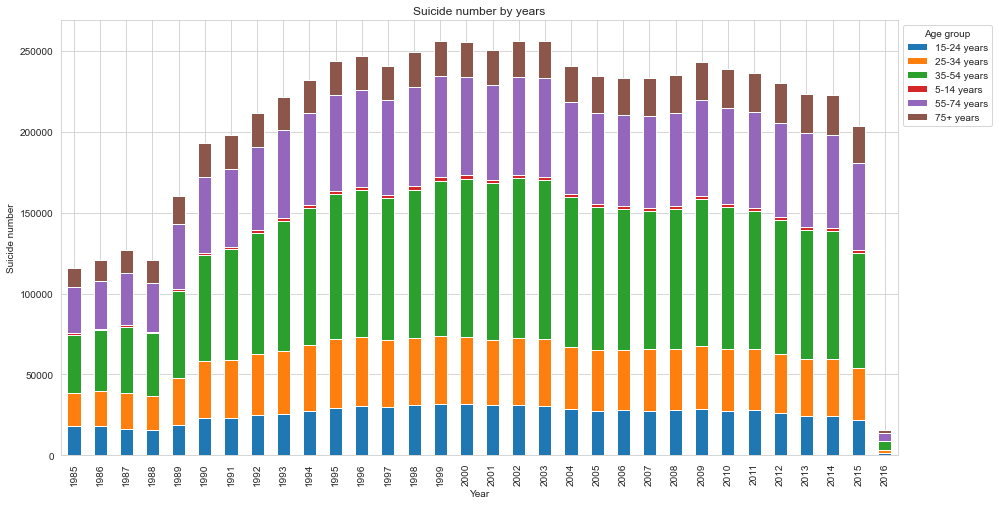

In [63]:
#Total suicide number by year
Tgsdtt = gsdtt.T
Tgsdtt.iloc[:,:].plot(kind='bar',stacked = True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1,1), title = 'Age group')
plt.title('Suicide number by years')
plt.xlabel('Year')
plt.ylabel('Suicide number')

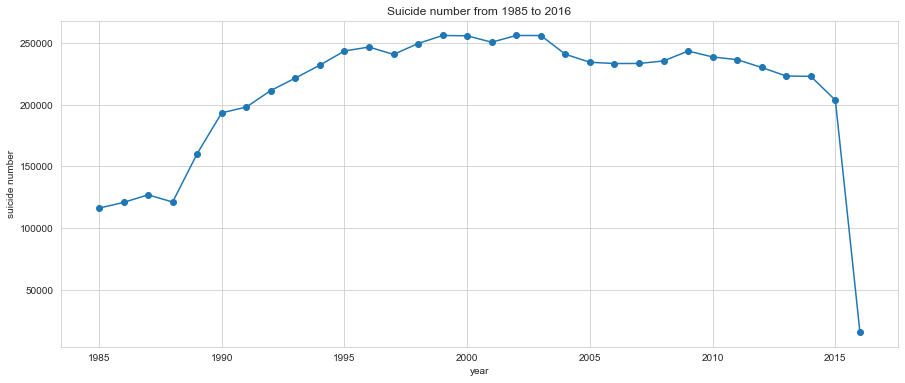

In [64]:
#Plot by year (line)
gsd_year=pd.DataFrame(sd.groupby(['year','country'])['suicides_no'].sum().unstack())
gsd_year = gsd_year.fillna(0)
gsd_year['Suicide number'] = gsd_year.sum(axis=1)

gsd_year.loc[:,'Suicide number'].plot(kind='line',figsize=(15,6),marker='o')
plt.title('Suicide number from 1985 to 2016')
plt.xlabel('year')
plt.ylabel('suicide number')
plt.show()

In [65]:
#male
gsdm = pd.DataFrame(gsd.iloc[[1,3,5,7,9,11],:])
gsdm

#female
gsdf = pd.DataFrame(gsd.iloc[[0,2,4,6,8,10],:])
gsdf


year                  1985     1986     1987     1988     1989     1990  \
age         sex                                                           
15-24 years female  4690.0   4821.0   4046.0   3447.0   4004.0   5308.0   
25-34 years female  4894.0   5058.0   4923.0   4468.0   5422.0   6772.0   
35-54 years female  9476.0  10047.0  10551.0  10014.0  12246.0  14622.0   
5-14 years  female   351.0    303.0    271.0    244.0    308.0    384.0   
55-74 years female  9057.0   9308.0  10373.0   9869.0  12727.0  14891.0   
75+ years   female  4011.0   4315.0   4842.0   4973.0   6654.0   8141.0   

year                   1991     1992     1993     1994  ...     2007     2008  \
age         sex                                         ...                     
15-24 years female   5034.0   5448.0   5181.0   5372.0  ...   5876.0   6163.0   
25-34 years female   6486.0   6830.0   6812.0   6846.0  ...   7254.0   7387.0   
35-54 years female  14824.0  15840.0  15947.0  16238.0  ...  17989.0  18408.0   
5-14 years  female    379.0    455.0    479.0    475.0  ...    585.0    628.0   
55-74 years female  14887.0  15129.0  15288.0  15129.0  ...  14004.0  13878.0   
75+ years   female   8012.0   7865.0   7624.0   7472.0  ...   7616.0   7509.0   

year                   2009     2010     2011     2012     2013     2014  \
age         sex                                                            
15-24 years female   6371.0   6164.0   6468.0   5940.0   5666.0   5452.0   
25-34 years female   7596.0   7363.0   7437.0   7080.0   6719.0   6871.0   
35-54 years female  18751.0  18468.0  18344.0  17986.0  17524.0  17424.0   
5-14 years  female    724.0    675.0    748.0    608.0    719.0    761.0   
55-74 years female  14216.0  14297.0  14227.0  14071.0  13810.0  13926.0   
75+ years   female   7262.0   7255.0   7392.0   7326.0   7021.0   7122.0   

year                   2015    2016  
age         sex                      
15-24 years female   5029.0   238.0  
25-34 years female   6265.0   373.0  
35-54 years female  15876.0  1232.0  
5-14 years  female    693.0     0.0  
55-74 years female  12881.0  1119.0  
75+ years   female   6504.0   542.0  

[6 rows x 32 columns]

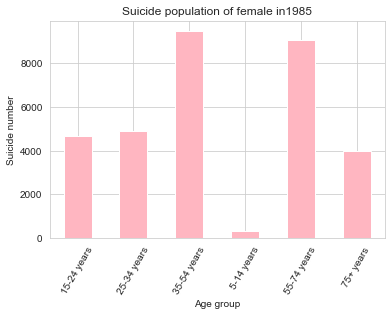

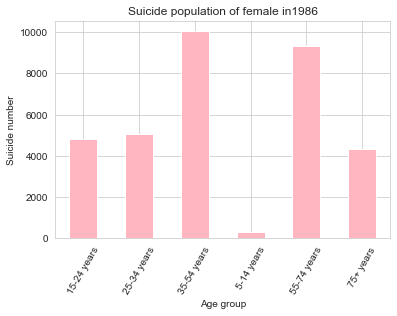

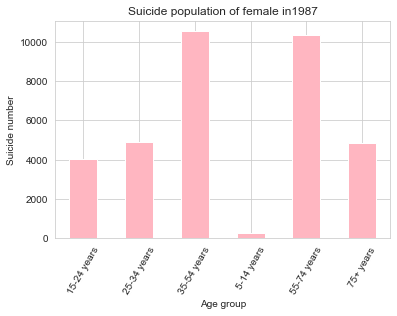

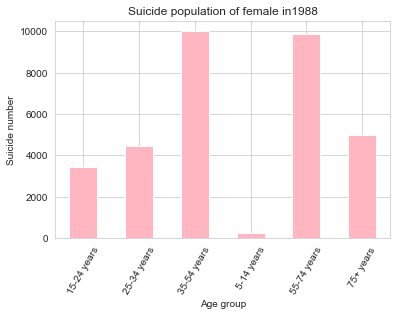

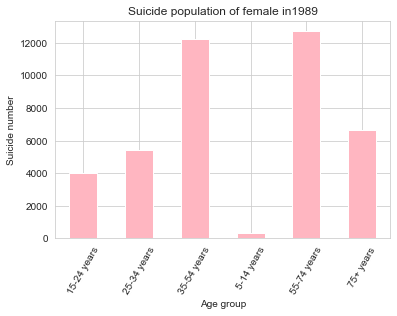

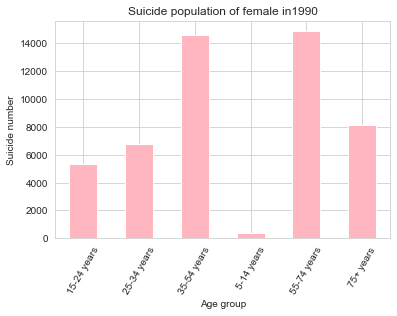

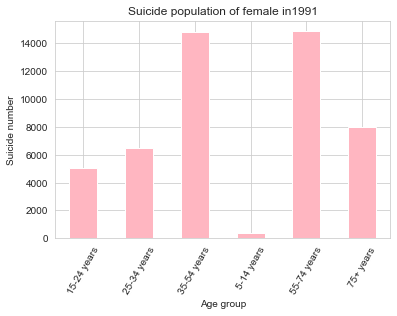

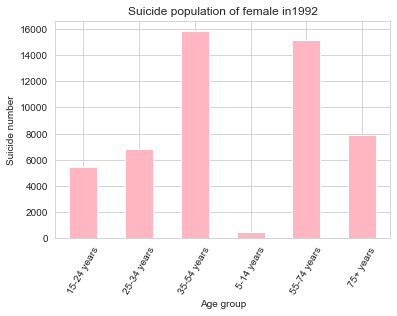

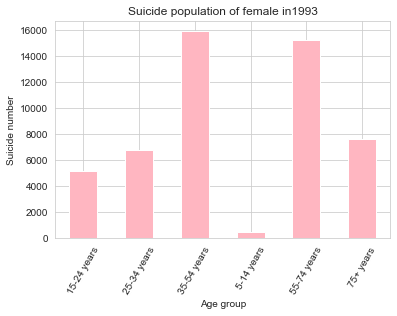

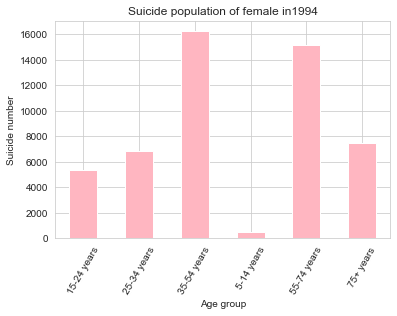

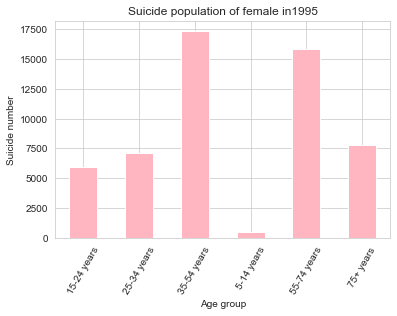

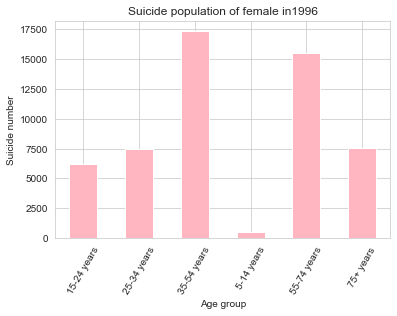

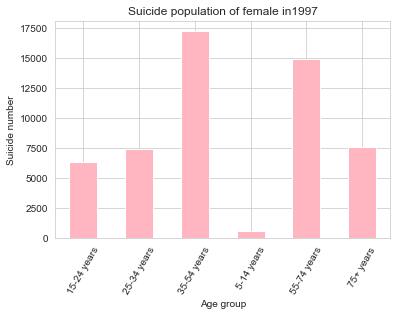

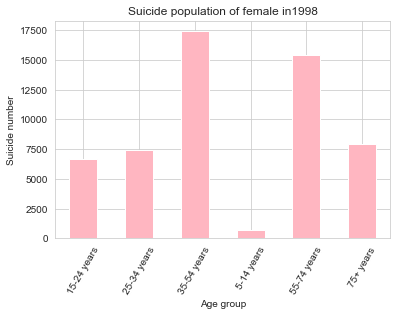

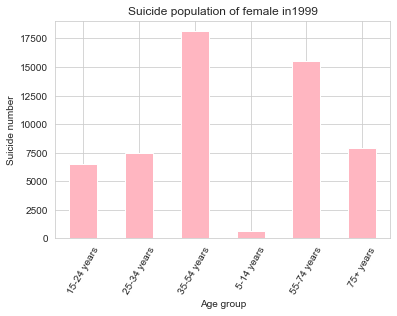

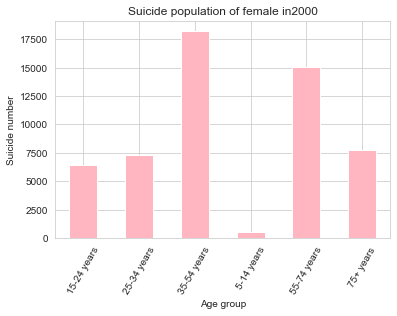

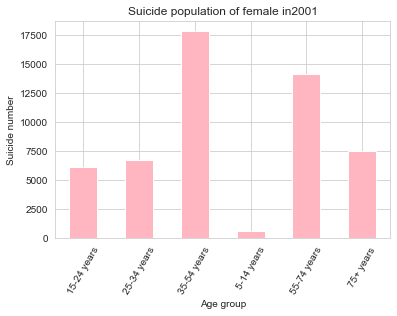

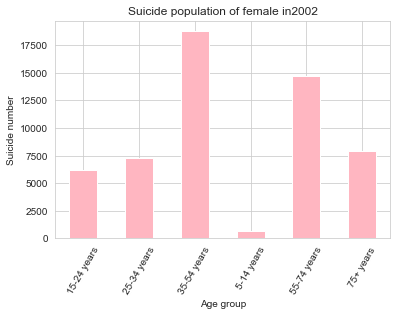

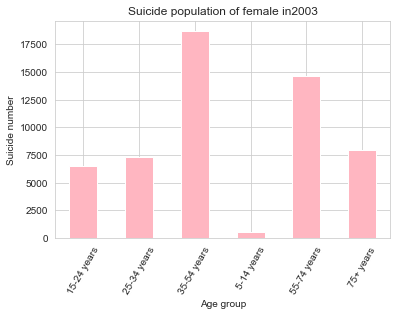

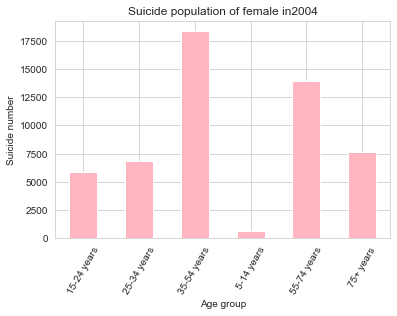

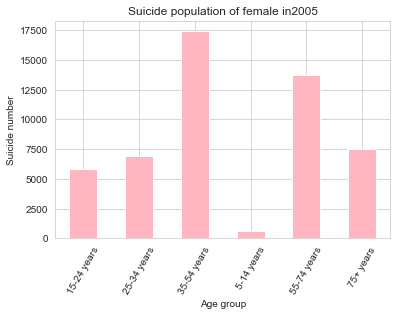

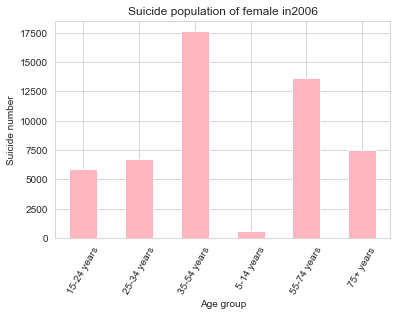

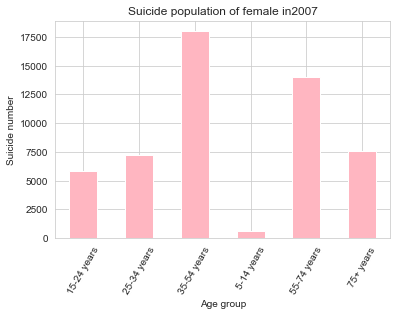

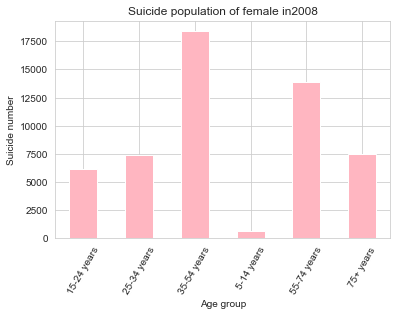

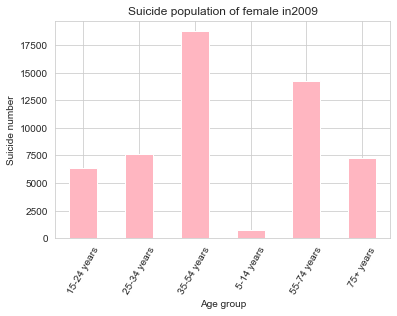

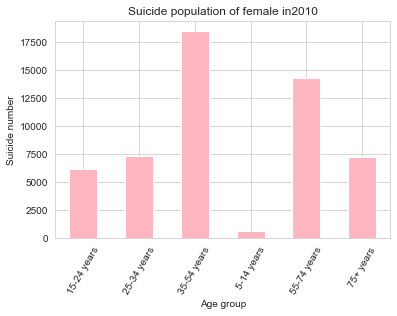

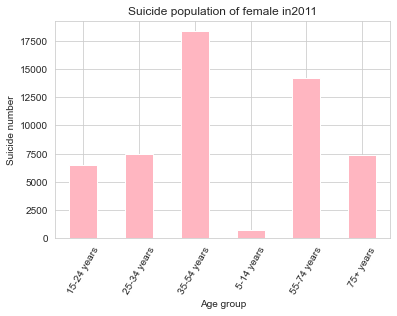

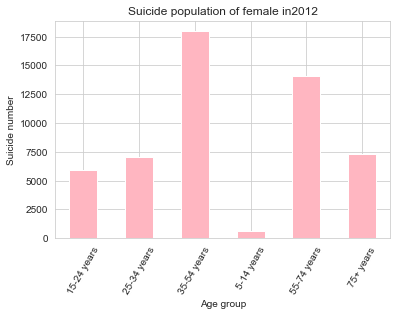

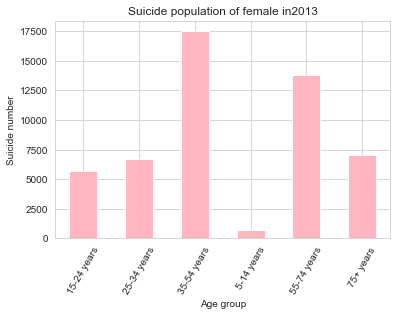

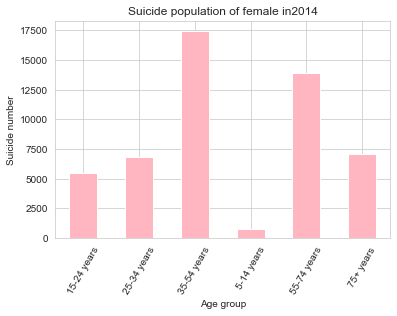

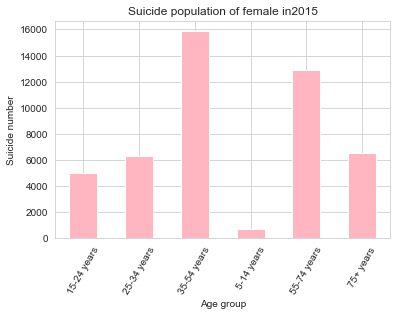

In [66]:
#Suicide population for female
for i in range(1985,2016):
    gsdf.loc[:,i].plot(kind='bar', color = ('lightpink'))
    plt.xticks(range(6),['15-24 years','25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'],rotation = 60)
    plt.xlabel('Age group')
    plt.ylabel('Suicide number')
    plt.title('Suicide population of female in'+ str(i))
    
    plt.show()

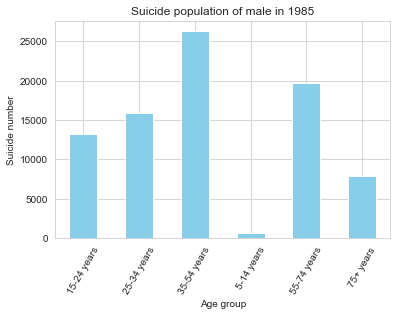

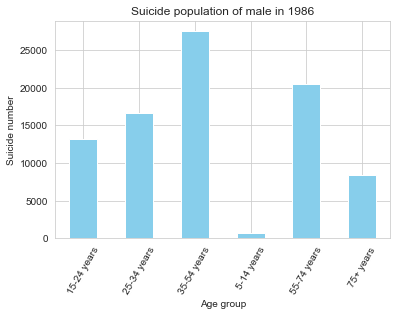

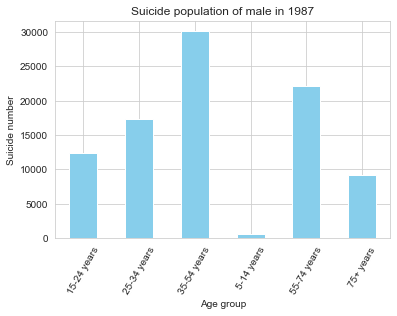

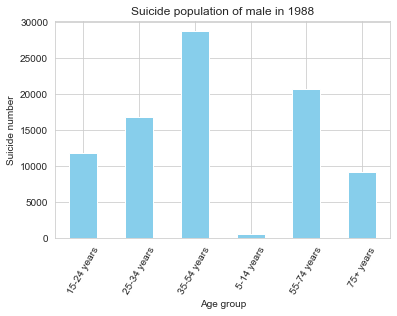

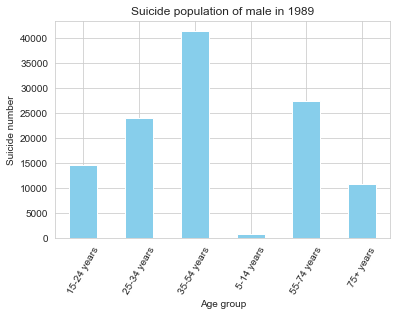

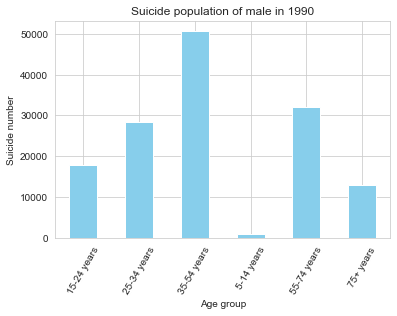

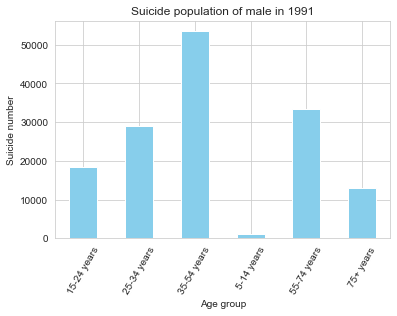

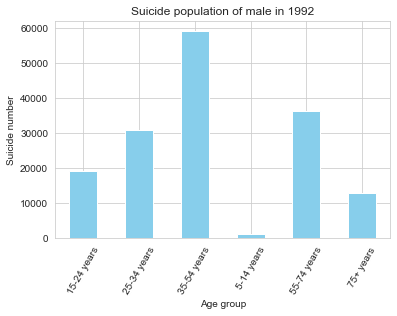

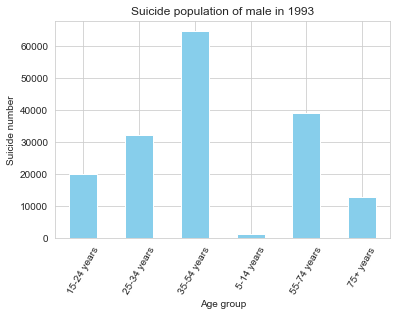

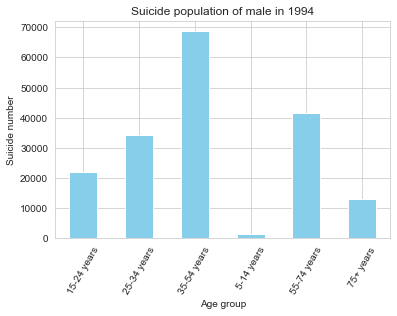

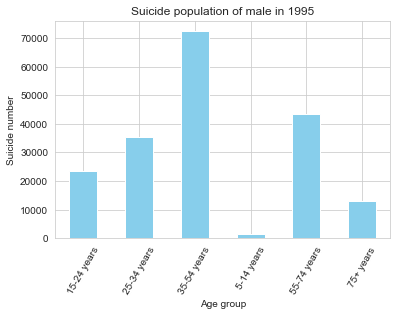

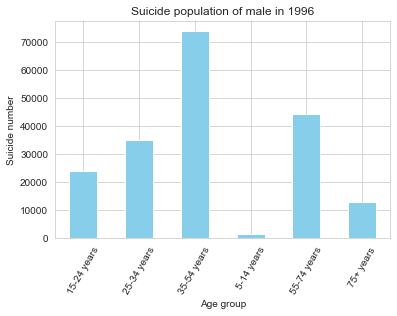

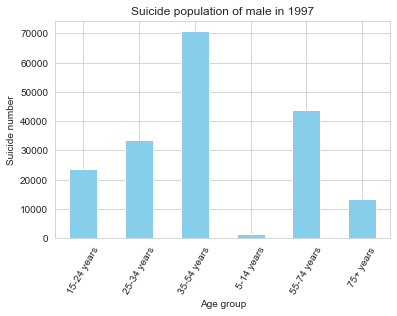

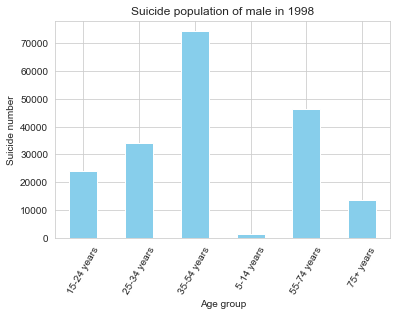

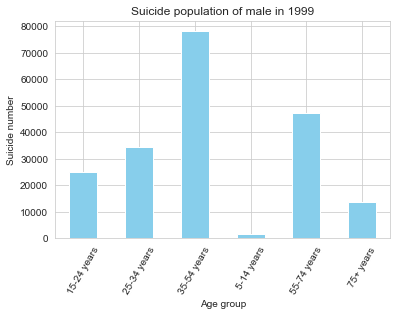

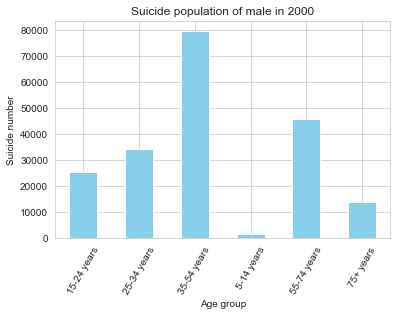

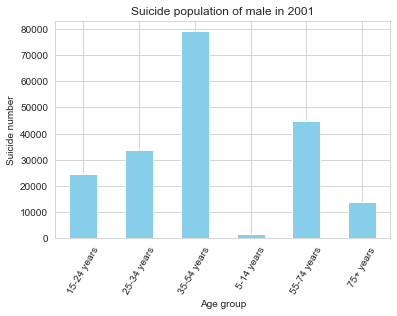

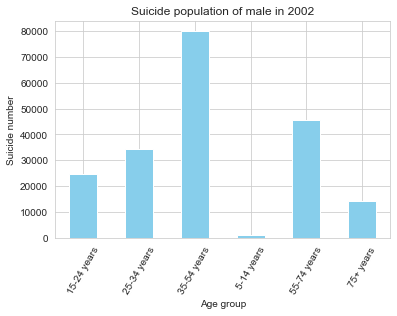

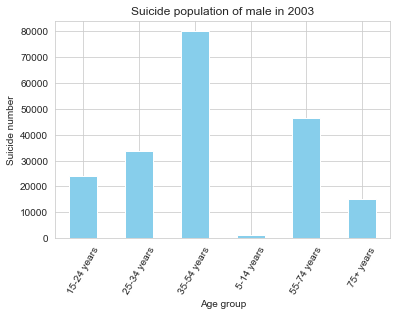

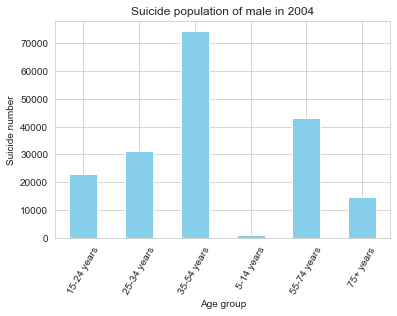

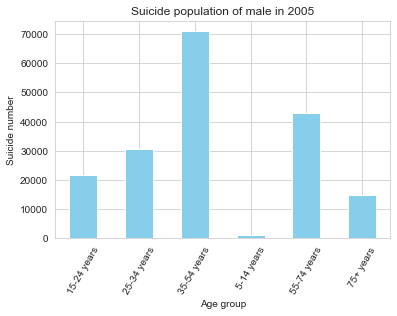

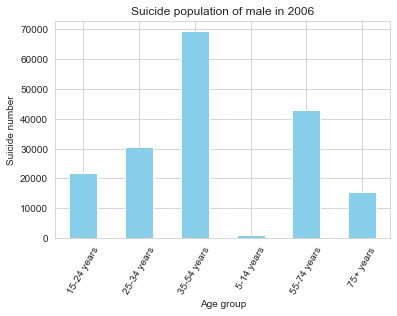

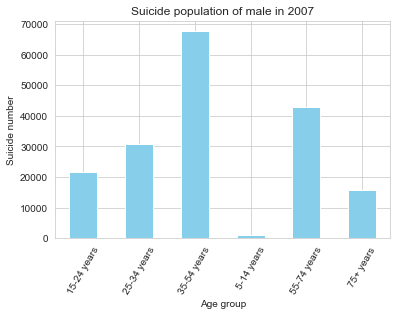

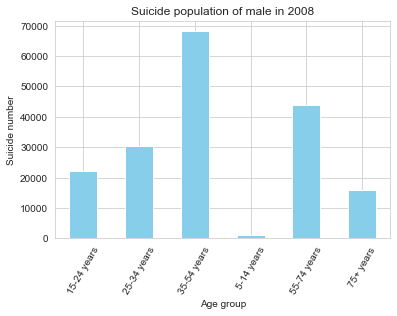

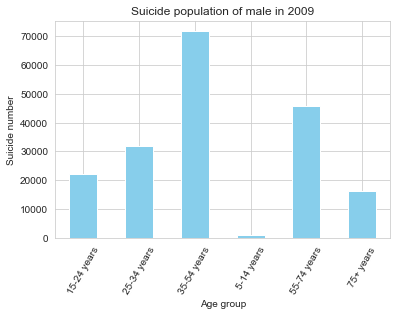

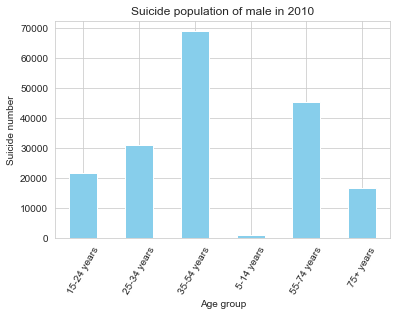

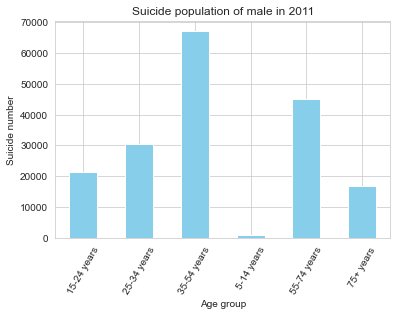

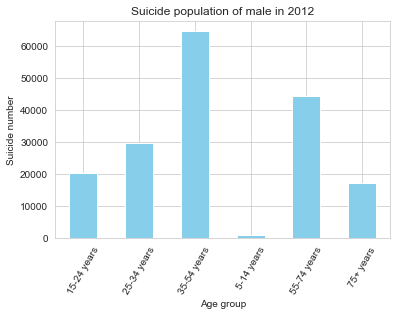

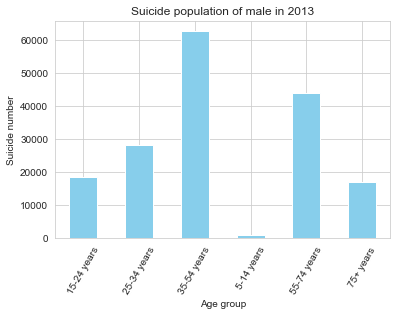

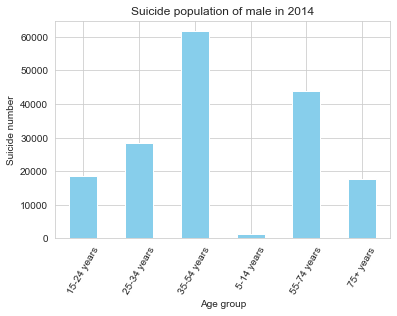

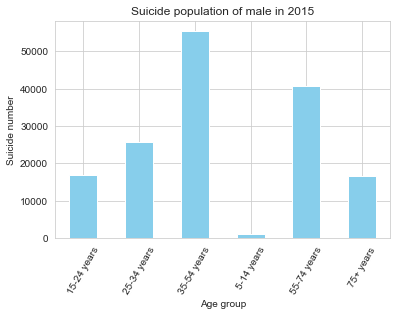

In [67]:
#Suicide population for male
for i in range(1985,2016):
    gsdm.loc[:,i].plot(kind='bar', color = ('skyblue'))
    plt.xticks(range(6),['15-24 years','25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'],rotation = 60)
    plt.xlabel('Age group')
    plt.ylabel('Suicide number')
    plt.title('Suicide population of male in '+ str(i))
    
    plt.show()

In [68]:
#Total number by age group
gsd_total=pd.DataFrame(sd.groupby(['age','sex'])['suicides_no'].sum().unstack())

total_gsd = pd.DataFrame(gsd_total.T.sum())
total_gsd

0
age                 
15-24 years   808542
25-34 years  1123912
35-54 years  2452141
5-14 years     52264
55-74 years  1658443
75+ years     653118

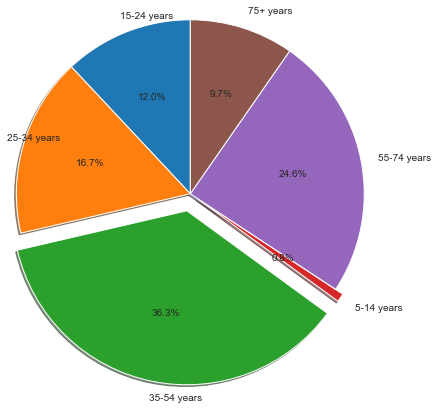

In [69]:
#Pie chart by age group

age=['15-24 years','25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']

plt.pie(total_gsd,
               labels = age,
               autopct = '%.1f%%',
               startangle =90,
               radius = 2,
               frame = 0,
               center = (4.5,4.5),
               explode=(0,0,0.2,0.1,0,0),
               shadow=True
               )

plt.show()

In [70]:
#Total by gender
sexsum = gsd_total
sexsum = pd.DataFrame(sexsum.sum())
sexsum = sexsum.reset_index()
sexsum

sex        0
0  female  1559510
1    male  5188910

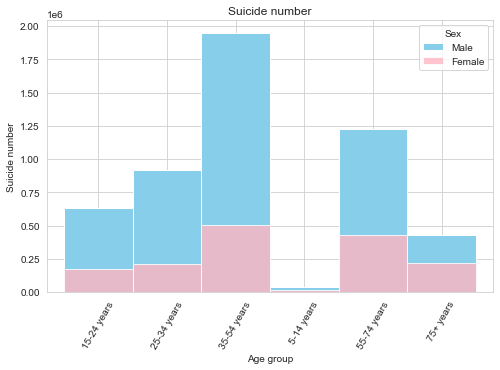

In [71]:
#Compare the suicide number of male and female
gsd_total.iloc[:,1].plot(kind='bar', color='skyblue', width = 1, figsize=(8,5))
gsd_total.iloc[:,0].plot(kind='bar', color='lightpink', width = 1, alpha = 0.8,figsize=(8,5))
plt.ylabel('Suicide number')
plt.xlabel('Age group')
plt.xticks(rotation = 60)
plt.title('Suicide number')
plt.legend(['Male','Female'], bbox_to_anchor=(1, 1),title = 'Sex')
plt.show()

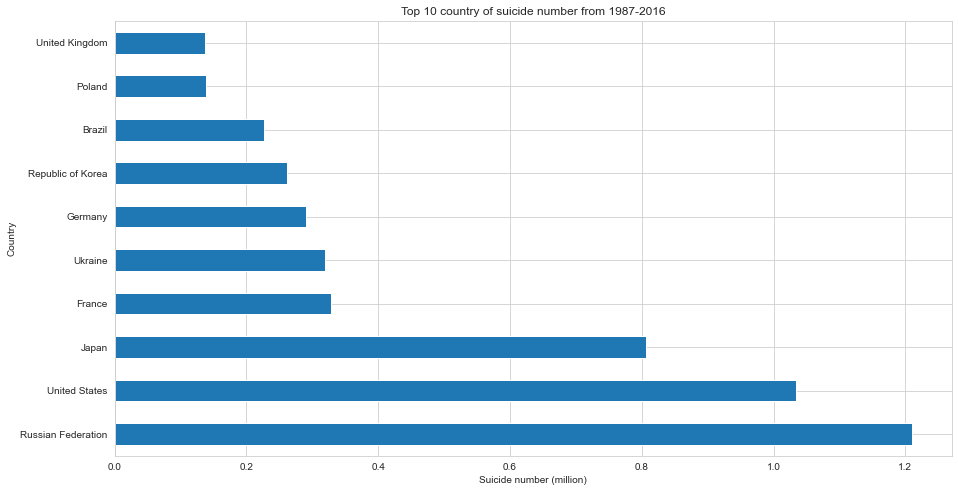

In [72]:
#Group data by country (absolute)
gsdcountry= (pd.DataFrame(sd.groupby(['country','sex'])['suicides_no'].sum().unstack()))/1000000
gsdcountry['Suicide number']=gsdcountry.apply(lambda gsdcountry: gsdcountry['female']+gsdcountry['male'], axis = 1)
gsdcountry = gsdcountry.sort_values(by='Suicide number',ascending=False)
gsdcountry.head(10)

gsdcountry.iloc[0:10,2].plot(kind='barh',figsize=(15,8))
plt.ylabel('Country')
plt.xlabel('Suicide number (million)')
plt.title('Top 10 country of suicide number from 1987-2016')

plt.show()

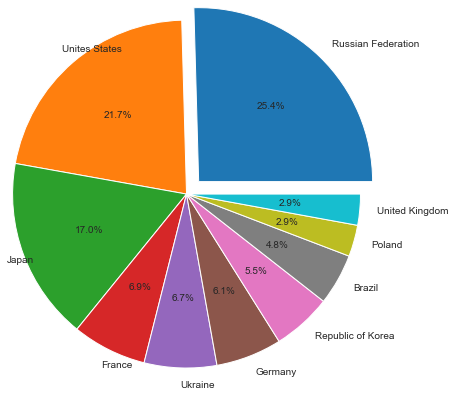

In [73]:
#Top ten suicide country by percentage
gsdcountry10 = pd.DataFrame(gsdcountry.iloc[0:10,2])

top10country = ["Russian Federation","Unites States","Japan","France","Ukraine","Germany","Republic of Korea","Brazil","Poland","United Kingdom"]

plt.pie(gsdcountry10,
               labels = top10country,
               autopct = '%.1f%%',
               startangle =0,
               radius = 2,
               frame = 0,
               center = (4.5,4.5),
               explode=(0.2,0,0,0,0,0,0,0,0,0),
               )
plt.show()

In [74]:
#Original suicide number data
gsdcountrynormal = gsdcountry*1000000
gsdcountrynormal = pd.DataFrame(gsdcountrynormal['Suicide number'])
gsdcountrynormal = gsdcountrynormal.reset_index()
gsdcountrynormal

country  Suicide number
0       Russian Federation       1209742.0
1            United States       1034013.0
2                    Japan        806902.0
3                   France        329127.0
4                  Ukraine        319950.0
..                     ...             ...
96                Maldives            20.0
97     Antigua and Barbuda            11.0
98              San Marino             4.0
99   Saint Kitts and Nevis             0.0
100               Dominica             0.0

[101 rows x 2 columns]

In [75]:
#Draw a choropleth map of world to show the suicide numnber by country
plotly.offline.init_notebook_mode()

#data to graph
my_data = [dict(type='choropleth', 
        autocolorscale=True,
        locations=gsdcountrynormal['country'],
        z=gsdcountrynormal['Suicide number'].astype(float),
        locationmode='country names',
        text=gsdcountrynormal['country'],
        hoverinfo='location+z',
        marker=dict(line=dict(color='rgb(180,180,180)',width=0.5)),
        colorbar=dict(title='Suicide number'))]

#layout
my_layout = dict(title='Suicide number',
                 geo=dict(scope='world',
                          projection=dict(type='mercator'),
                          showcoastlines= False,
                          showframe= False))

fig = dict(data=my_data, layout=my_layout)
py.iplot(fig, validata=False, filename='Suicide number')

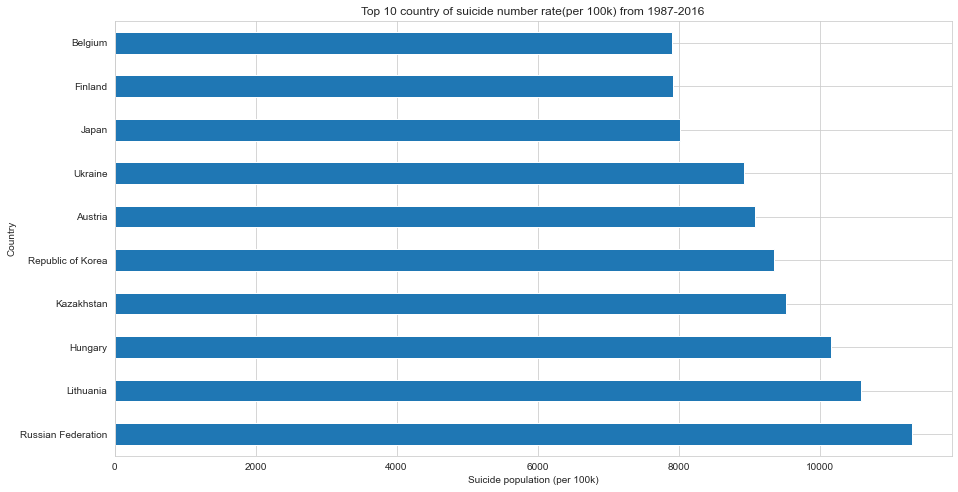

In [76]:
#Group data by country (per 100k)
gsdcountryper= pd.DataFrame(sd.groupby(['country','sex'])['suicides/100k pop'].sum().unstack())
gsdcountryper['Suicide number']=gsdcountryper.apply(lambda gsdcountryper: gsdcountryper['female']
                                                    +gsdcountryper['male'], axis = 1)
gsdcountryper = gsdcountryper.sort_values(by='Suicide number',ascending=False)
gsdcountryper.head(10)

gsdcountryper.iloc[0:10,2].plot(kind='barh',figsize=(15,8))
plt.ylabel('Country')
plt.xlabel('Suicide population (per 100k)')
plt.title('Top 10 country of suicide number rate(per 100k) from 1987-2016')

plt.show()

## Step 3: Read the life expectancy data

In [77]:
#Life expectancy dataset
life = pd.read_csv('Life_expectancy.csv', index_col = 0, encoding='latin')
life.head(10)

Year      Status  Life expectancy   Adult Mortality  \
Country                                                            
Afghanistan  2015  Developing              65.0            263.0   
Afghanistan  2014  Developing              59.9            271.0   
Afghanistan  2013  Developing              59.9            268.0   
Afghanistan  2012  Developing              59.5            272.0   
Afghanistan  2011  Developing              59.2            275.0   
Afghanistan  2010  Developing              58.8            279.0   
Afghanistan  2009  Developing              58.6            281.0   
Afghanistan  2008  Developing              58.1            287.0   
Afghanistan  2007  Developing              57.5            295.0   
Afghanistan  2006  Developing              57.3            295.0   

             infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Country                                                                    
Afghanistan             62     0.01               71.279624         65.0   
Afghanistan             64     0.01               73.523582         62.0   
Afghanistan             66     0.01               73.219243         64.0   
Afghanistan             69     0.01               78.184215         67.0   
Afghanistan             71     0.01                7.097109         68.0   
Afghanistan             74     0.01               79.679367         66.0   
Afghanistan             77     0.01               56.762217         63.0   
Afghanistan             80     0.03               25.873925         64.0   
Afghanistan             82     0.02               10.910156         63.0   
Afghanistan             84     0.03               17.171518         64.0   

             Measles    BMI   ...  Polio  Total expenditure  Diphtheria   \
Country                       ...                                          
Afghanistan      1154   19.1  ...    6.0               8.16         65.0   
Afghanistan       492   18.6  ...   58.0               8.18         62.0   
Afghanistan       430   18.1  ...   62.0               8.13         64.0   
Afghanistan      2787   17.6  ...   67.0               8.52         67.0   
Afghanistan      3013   17.2  ...   68.0               7.87         68.0   
Afghanistan      1989   16.7  ...   66.0               9.20         66.0   
Afghanistan      2861   16.2  ...   63.0               9.42         63.0   
Afghanistan      1599   15.7  ...   64.0               8.33         64.0   
Afghanistan      1141   15.2  ...   63.0               6.73         63.0   
Afghanistan      1990   14.7  ...   58.0               7.43         58.0   

              HIV/AIDS         GDP  Population   thinness  1-19 years  \
Country                                                                 
Afghanistan        0.1  584.259210  33736494.0                   17.2   
Afghanistan        0.1  612.696514    327582.0                   17.5   
Afghanistan        0.1  631.744976  31731688.0                   17.7   
Afghanistan        0.1  669.959000   3696958.0                   17.9   
Afghanistan        0.1   63.537231   2978599.0                   18.2   
Afghanistan        0.1  553.328940   2883167.0                   18.4   
Afghanistan        0.1  445.893298    284331.0                   18.6   
Afghanistan        0.1  373.361116   2729431.0                   18.8   
Afghanistan        0.1  369.835796  26616792.0                   19.0   
Afghanistan        0.1  272.563770   2589345.0                   19.2   

              thinness 5-9 years  Income composition of resources  Schooling  
Country                                                                       
Afghanistan                 17.3                            0.479       10.1  
Afghanistan                 17.5                            0.476       10.0  
Afghanistan                 17.7                            0.470        9.9  
Afghanistan                 18.0                            0.463        9.8  
Afghanistan        

In [78]:
life.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [79]:
#Life expectancy data group by country
leten = pd.DataFrame(life.loc[["Russian Federation","Lithuania","Hungary","Kazakhstan","Republic of Korea",
                             "Austria","Ukraine","Japan","Finland","Belgium"],:])
leten
letengp = pd.DataFrame(leten.groupby(['Country','Year'])['Life expectancy '].sum().unstack())
letengp = letengp.reindex(["Russian Federation","Lithuania","Hungary","Kazakhstan","Republic of Korea",
                           "Austria","Ukraine","Japan","Finland","Belgium"])

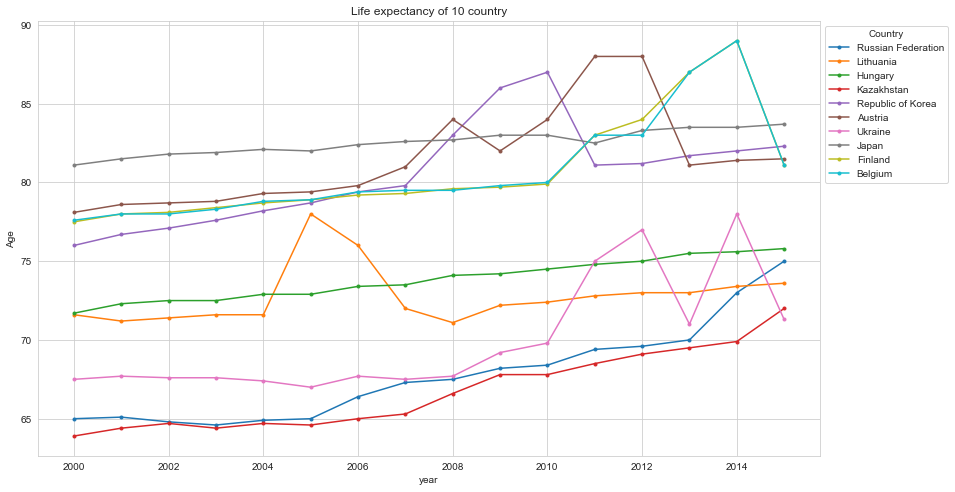

In [80]:
#The life expectancy by year (Top 10 suicide number rate(100k) country)
Tletengp = letengp.T
Tletengp.iloc[:,:].plot(kind='line',figsize=(14,8), marker='.')         
plt.legend(bbox_to_anchor=(1,1),title='Country')
plt.title('Life expectancy of 10 country')
plt.xlabel('year')
plt.ylabel('Age')

plt.show()  

In [81]:
#Calculate life expectancy mean
letengp['life mean'] = letengp.mean(axis=1)
letengp

Year                2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Country                                                                    
Russian Federation  65.0  65.1  64.8  64.6  64.9  65.0  66.4  67.3  67.5   
Lithuania           71.6  71.2  71.4  71.6  71.6  78.0  76.0  72.0  71.1   
Hungary             71.7  72.3  72.5  72.5  72.9  72.9  73.4  73.5  74.1   
Kazakhstan          63.9  64.4  64.7  64.4  64.7  64.6  65.0  65.3  66.6   
Republic of Korea   76.0  76.7  77.1  77.6  78.2  78.7  79.4  79.8  83.0   
Austria             78.1  78.6  78.7  78.8  79.3  79.4  79.8  81.0  84.0   
Ukraine             67.5  67.7  67.6  67.6  67.4  67.0  67.7  67.5  67.7   
Japan               81.1  81.5  81.8  81.9  82.1  82.0  82.4  82.6  82.7   
Finland             77.5  78.0  78.1  78.4  78.7  78.9  79.2  79.3  79.6   
Belgium             77.6  78.0  78.0  78.3  78.8  78.9  79.4  79.5  79.5   

Year                2009  2010  2011  2012  2013  2014  2015  life mean  
Country                                                                  
Russian Federation  68.2  68.4  69.4  69.6  70.0  73.0  75.0   67.76250  
Lithuania           72.2  72.4  72.8  73.0  73.0  73.4  73.6   72.80625  
Hungary             74.2  74.5  74.8  75.0  75.5  75.6  75.8   73.82500  
Kazakhstan          67.8  67.8  68.5  69.1  69.5  69.9  72.0   66.76250  
Republic of Korea   86.0  87.0  81.1  81.2  81.7  82.0  82.3   80.48750  
Austria             82.0  84.0  88.0  88.0  81.1  81.4  81.5   81.48125  
Ukraine             69.2  69.8  75.0  77.0  71.0  78.0  71.3   69.93750  
Japan               83.0  83.0  82.5  83.3  83.5  83.5  83.7   82.53750  
Finland             79.7  79.9  83.0  84.0  87.0  89.0  81.1   80.71250  
Belgium             79.8  80.0  83.0  83.0  87.0  89.0  81.1   80.68125

## Step 4: Merge the life expectancy data with suicide data

In [82]:
#Life ex vs suicide
legp = pd.DataFrame(life.groupby(['Country','Year'])['Life expectancy '].sum().unstack())
legp['life mean'] = legp.mean(axis=1)

combine_life_sd = pd.concat([legp,gsdcountryper],axis=1)
combine_life_sd = combine_life_sd.loc[:,['life mean','Suicide number']]
combine_life_sd = combine_life_sd[~(combine_life_sd == 0).any(axis=1)]
combine_life_sd

life mean  Suicide number
Afghanistan                    58.19375             NaN
Albania                        75.15625          924.76
Algeria                        73.61875             NaN
Angola                         49.01875             NaN
Antigua and Barbuda            75.05625          179.14
...                                 ...             ...
Puerto Rico                         NaN         3789.28
United Kingdom                      NaN         2790.92
Saint Vincent and Grenadines        NaN         1726.63
Aruba                               NaN         1596.52
Macau                               NaN          171.74

[190 rows x 2 columns]

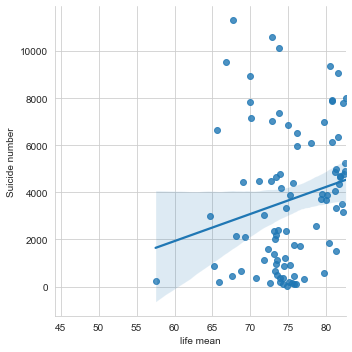

In [83]:
#The correlation between Suicide number vs life
sns.lmplot(x = "life mean",y = "Suicide number",data = combine_life_sd)
plt.show()

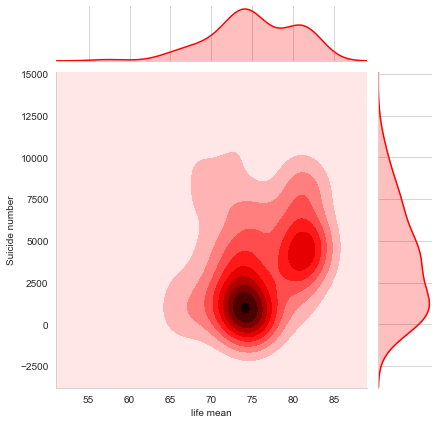

In [84]:
g = sns.jointplot(x = "life mean",y = "Suicide number", data=combine_life_sd, kind='kde',color="r")
plt.show()

## Step 5: Read the GDP data 

In [85]:
#GDP of top 10 suicide number countries
countries = ["Russian Federation","Lithuania","Hungary","Kazakhstan","Republic of Korea","Austria","Ukraine","Japan","Finland","Belgium"]
GDPfile = pd.read_csv('GDP_by_Country.csv', index_col = 0)
GDPfile.head()
GDPfile['GDP mean'] = GDPfile.mean(axis=1)
GDP = GDPfile.reset_index()
GDP = pd.DataFrame(GDP.loc[:,["Country Name","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","GDP mean"]])

GDPdata = pd.DataFrame(GDPfile.loc[countries,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]])

GDPdata['GDP mean'] = GDPdata.mean(axis=1)
GDPdata


2000          2001          2002          2003  \
Country Name                                                                 
Russian Federation  2.600000e+11  3.070000e+11  3.450000e+11  4.300000e+11   
Lithuania           1.153921e+10  1.225250e+10  1.427836e+10  1.880258e+10   
Hungary             4.731062e+10  5.382132e+10  6.771689e+10  8.532477e+10   
Kazakhstan          1.829199e+10  2.215269e+10  2.463659e+10  3.083370e+10   
Republic of Korea   5.620000e+11  5.330000e+11  6.090000e+11  6.810000e+11   
Austria             1.970000e+11  1.970000e+11  2.130000e+11  2.620000e+11   
Ukraine             3.126153e+10  3.800934e+10  4.239290e+10  5.013295e+10   
Japan               4.890000e+12  4.300000e+12  4.120000e+12  4.450000e+12   
Finland             1.260000e+11  1.290000e+11  1.400000e+11  1.710000e+11   
Belgium             2.380000e+11  2.380000e+11  2.590000e+11  3.190000e+11   

                            2004          2005          2006          2007  \
Country Name                                                                 
Russian Federation  5.910000e+11  7.640000e+11  9.900000e+11  1.300000e+12   
Lithuania           2.264993e+10  2.612558e+10  3.021606e+10  3.973818e+10   
Hungary             1.040000e+11  1.130000e+11  1.150000e+11  1.400000e+11   
Kazakhstan          4.315165e+10  5.712367e+10  8.100388e+10  1.050000e+11   
Republic of Korea   7.650000e+11  8.980000e+11  1.010000e+12  1.120000e+12   
Austria             3.010000e+11  3.160000e+11  3.360000e+11  3.890000e+11   
Ukraine             6.488306e+10  8.614202e+10  1.080000e+11  1.430000e+11   
Japan               4.820000e+12  4.760000e+12  4.530000e+12  4.520000e+12   
Finland             1.970000e+11  2.040000e+11  2.170000e+11  2.550000e+11   
Belgium             3.710000e+11  3.870000e+11  4.100000e+11  4.720000e+11   

                            2008          2009          2010          2011  \
Country Name                                                                 
Russian Federation  1.660000e+12  1.220000e+12  1.520000e+12  2.050000e+12   
Lithuania           4.785055e+10  3.744067e+10  3.712052e+10  4.347688e+10   
Hungary             1.580000e+11  1.310000e+11  1.310000e+11  1.410000e+11   
Kazakhstan          1.330000e+11  1.150000e+11  1.480000e+11  1.930000e+11   
Republic of Korea   1.000000e+12  9.020000e+11  1.090000e+12  1.200000e+12   
Austria             4.300000e+11  4.000000e+11  3.920000e+11  4.310000e+11   
Ukraine             1.800000e+11  1.170000e+11  1.360000e+11  1.630000e+11   
Japan               5.040000e+12  5.230000e+12  5.700000e+12  6.160000e+12   
Finland             2.840000e+11  2.510000e+11  2.480000e+11  2.740000e+11   
Belgium             5.190000e+11  4.850000e+11  4.840000e+11  5.270000e+11   

                            2012          2013          2014          2015  \
Country Name                                                                 
Russian Federation  2.210000e+12  2.300000e+12  2.060000e+12  1.370000e+12   
Lithuania           4.284790e+10  4.647365e+10  4.854525e+10  4.140202e+10   
Hungary             1.280000e+11  1.350000e+11  1.400000e+11  1.230000e+11   
Kazakhstan          2.080000e+11  2.370000e+11  2.210000e+11  1.840000e+11   
Republic of Korea   1.220000e+12  1.310000e+12  1.410000e+12  1.380000e+12   
Austria             4.090000e+11  4.300000e+11  4.420000e+11  3.820000e+11   
Ukraine             1.760000e+11  1.830000e+11  1.340000e+11  9.103096e+10   
Japan               6.200000e+12  5.160000e+12  4.850000e+12  4.380000e+12   
Finland             2.570000e+11  2.700000e+11  2.730000e+11  2.320000e+11   
Belgium             4.980000e+11  5.210000e+11  5.310000e+11  4.550000e+11   

                        GDP mean  
Country Name                      
Russian Federation  1.211062e+12  
Lithuania           3.254749e+10  
Hungary             1.133233e+11  
Kazakhstan          1.138246e+11  
Republic of Korea   9.806250e+11  
Austria             3.454375e+11  


In [86]:

colorscale = [[0.0, "rgb(242,240,247)"], 
          [0.2, "rgb(218,218,235)"], 
          [0.4, "rgb(188,189,220)"],
          [0.6, "rgb(158,154,200)"], 
          [0.8, "rgb(117,107,177)"], 
          [1.0, "rgb(84,39,143)"]]
#data to graph
my_data01 = [dict(type='choropleth', 
        colorscale=colorscale,
        locations=GDP['Country Name'],
        z=GDP['GDP mean'].astype(float),
        locationmode='country names',
        text=GDP['Country Name'],
        hoverinfo='location+z',
        marker=dict(line=dict(color='rgb(180,180,180)',width=0.5)),
        colorbar=dict(title='GDP'))]

#layout
my_layout01 = dict(title='GDP',
                 geo=dict(scope='world',
                          projection=dict(type='mercator'),
                          showcoastlines= False,
                          showframe= False))

fig = dict(data=my_data01, layout=my_layout01)
py.iplot(fig, validata=False, filename='GDP')

## Step 6: Read the population data

In [87]:
#Population dataset
popfile = pd.read_csv('population.csv', index_col = 0)
popfile.head()

popdata = pd.DataFrame(popfile.loc[:,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]])
popdata

2000        2001        2002        2003        2004  \
Country Name                                                               
Aruba            90853.0     92898.0     94992.0     97017.0     98737.0   
Afghanistan   20779953.0  21606988.0  22600770.0  23680871.0  24726684.0   
Angola        16395473.0  16945753.0  17519417.0  18121479.0  18758145.0   
Albania        3089027.0   3060173.0   3051010.0   3039616.0   3026939.0   
Andorra          65390.0     67341.0     70049.0     73182.0     76244.0   
...                  ...         ...         ...         ...         ...   
Kosovo         1700000.0   1701154.0   1702310.0   1703466.0   1704622.0   
Yemen, Rep.   17409072.0  17918373.0  18443691.0  18985000.0  19540098.0   
South Africa  44967708.0  45571274.0  46150913.0  46719196.0  47291610.0   
Zambia        10415944.0  10692193.0  10971698.0  11256743.0  11550642.0   
Zimbabwe      11881477.0  11923914.0  11954290.0  11982224.0  12019912.0   

                    2005        2006        2007        2008        2009  \
Country Name                                                               
Aruba           100031.0    100834.0    101222.0    101358.0    101455.0   
Afghanistan   25654277.0  26433049.0  27100536.0  27722276.0  28394813.0   
Angola        19433602.0  20149901.0  20905363.0  21695634.0  22514281.0   
Albania        3011487.0   2992547.0   2970017.0   2947314.0   2927519.0   
Andorra          78867.0     80993.0     82684.0     83862.0     84463.0   
...                  ...         ...         ...         ...         ...   
Kosovo         1705780.0   1719536.0   1733404.0   1747383.0   1761474.0   
Yemen, Rep.   20107409.0  20687646.0  21282515.0  21892146.0  22516460.0   
South Africa  47880601.0  48489459.0  49119759.0  49779471.0  50477011.0   
Zambia        11856247.0  12173514.0  12502958.0  12848530.0  13215139.0   
Zimbabwe      12076699.0  12155491.0  12255922.0  12379549.0  12526968.0   

                    2010        2011        2012        2013        2014  \
Country Name                                                               
Aruba           101669.0    102046.0    102560.0    103159.0    103774.0   
Afghanistan   29185507.0  30117413.0  31161376.0  32269589.0  33370794.0   
Angola        23356246.0  24220661.0  25107931.0  26015780.0  26941779.0   
Albania        2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
Andorra          84449.0     83747.0     82427.0     80774.0     79213.0   
...                  ...         ...         ...         ...         ...   
Kosovo         1775680.0   1791000.0   1807106.0   1818117.0   1812771.0   
Yemen, Rep.   23154855.0  23807588.0  24473178.0  25147109.0  25823485.0   
South Africa  51216964.0  52004172.0  52834005.0  53689236.0  54545991.0   
Zambia        13605984.0  14023193.0  14465121.0  14926504.0  15399753.0   
Zimbabwe      12697723.0  12894316.0  13115131.0  13350356.0  13586681.0   

                    2015  
Country Name              
Aruba           104341.0  
Afghanistan   34413603.0  
Angola        27884381.0  
Albania        2880703.0  
Andorra          78011.0  
...                  ...  
Kosovo         1788196.0  
Yemen, Rep.   26497889.0  
South Africa  55386367.0  
Zambia        15879361.0  
Zimbabwe      13814629.0  

[264 rows x 16 columns]

In [88]:
#GDP of per capita
GDP_data = pd.DataFrame(GDPfile.loc[:,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]])
GDP_data['GDP mean'] = GDP_data.mean(axis=1)
perGDP = GDP_data/popdata
perGDP['perGDP mean'] = perGDP.mean(axis=1)

perGDP = pd.DataFrame(perGDP.loc[:,["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","perGDP mean"]])
perGDP.dropna()
perGDP

2000          2001          2002          2003  \
Country Name                                                                 
Afghanistan                  NaN    113.929157    182.684958    193.558938   
Albania              1175.788981   1326.970339   1453.642777   1890.681557   
Algeria              1765.022577   1740.606649   1781.826864   2103.381467   
American Samoa               NaN           NaN   8700.067705   8856.547459   
Andorra             21936.530096  22228.846498  24741.493569  32776.442267   
...                          ...           ...           ...           ...   
West Bank and Gaza   1476.171850   1335.553195   1156.217473   1257.698570   
World                5495.285021   5392.600891   5515.919429   6124.168835   
Yemen, Rep.           553.524178    549.940676    579.779736    620.372298   
Zambia                345.689554    382.941178    382.242172    435.458083   
Zimbabwe              563.057741    568.385909    530.530579    478.007405   

                            2004          2005          2006          2007  \
Country Name                                                                 
Afghanistan           213.755540    244.601459    266.999029    363.234235   
Albania              2416.588235   2709.142931   3005.012903   3603.013685   
Algeria              2609.952692   3107.114859   3477.898786   3951.184202   
American Samoa       8578.944723   8444.981700   8391.561067   8909.449156   
Andorra             38503.479618  41282.020122  43747.691850  48582.220877   
...                          ...           ...           ...           ...   
West Bank and Gaza   1337.565724   1455.187875   1441.461700   1575.563400   
World                6810.176210   7279.151056   7796.461343   8675.192273   
Yemen, Rep.           710.001602    833.213744    922.372844   1017.573228   
Zambia                538.591506    702.740941   1047.919187   1124.290586   
Zimbabwe              482.998411    476.555324    447.854924    431.787188   

                            2008          2009          2010          2011  \
Country Name                                                                 
Afghanistan           367.593551    439.761428    546.051869    595.344607   
Albania              4370.539647   4114.136545   4094.358832   4437.178069   
Algeria              4923.610897   3877.298392   4475.024706   5455.322491   
American Samoa       9792.666806  11961.258226  10271.224523  10294.302265   
Andorra             47785.089278  43338.866758  39736.354060  41100.729937   
...                          ...           ...           ...           ...   
West Bank and Gaza   1857.890515   1970.182963   2354.125987   2695.193853   
World                9397.775865   8801.717402   9534.993378  10467.151089   
Yemen, Rep.          1229.246843   1116.084594   1334.784845   1374.621313   
Zambia               1394.000608   1159.907762   1489.459070   1672.949830   
Zimbabwe              356.693350    688.241050    798.714833    938.277823   

                            2012          2013          2014          2015  \
Country Name                                                                 
Afghanistan           659.038379    621.214429    600.830471    558.371124   
Albania              4247.614308   4413.081697   4578.666727   3934.895394   
Algeria              5590.643905   5506.011358   5497.937541   4178.410580   
American Samoa      11568.793001  11505.393714  11525.156387  11807.496596   
Andorra             38392.943902  40626.751628  42300.334124  36039.653498   
...                          ...           ...           ...           ...   
West Bank and Gaza   2834.021525   3060.312389   3046.821798   2967.851747   
World               10570.491235  10739.730095  10890.200293  10192.172930   
Yemen, Rep.          1446.201557   1607.152275   1674.002712   1424.034946   
Zambia               1763.094184   1878.903489   1763.056239   1332.194321   
Zimbabwe             1085.958673   1157.404990 

## Step 7: Merge the GDP data with suicide data

In [89]:
#perGDP vs suicide
combine_gdp_sd = pd.concat([perGDP,gsdcountryper],axis=1)
combine_gdp_sd = combine_gdp_sd.loc[:,['perGDP mean','Suicide number']]
combine_gdp_sd

perGDP mean  Suicide number
Afghanistan                     397.797945             NaN
Albania                        3235.707039          924.76
Algeria                        3752.577998             NaN
American Samoa                10043.417381             NaN
Andorra                       37694.965505             NaN
...                                    ...             ...
Saint Lucia                            NaN         2420.12
Saint Vincent and Grenadines           NaN         1726.63
Bahamas                                NaN          344.28
Macau                                  NaN          171.74
Saint Kitts and Nevis                  NaN            0.00

[275 rows x 2 columns]

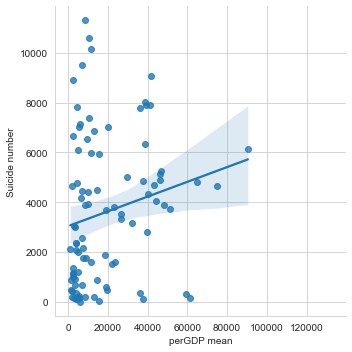

In [90]:
#The correlation between perGDP vs suicide number
sns.lmplot(x = "perGDP mean",y = "Suicide number",data = combine_gdp_sd)
plt.show()

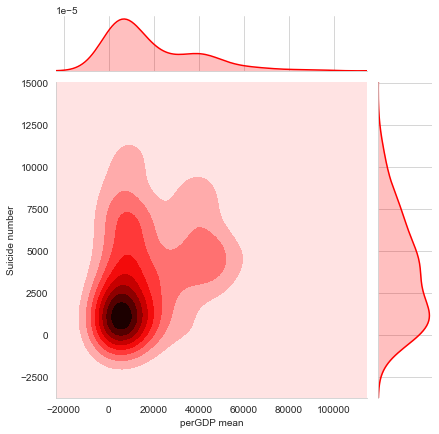

In [91]:
g = sns.jointplot(x = "perGDP mean",y = "Suicide number", data=combine_gdp_sd, kind='kde',color="r")
plt.show()

## Step 8: Read the happiness score data

In [92]:
#Happiness score
hp = pd.read_csv('2015.csv', index_col = 0, encoding='latin')
hp = pd.DataFrame(hp["Happiness Score"])
hp.head(10)

Happiness Score
Country                     
Switzerland            7.587
Iceland                7.561
Denmark                7.527
Norway                 7.522
Canada                 7.427
Finland                7.406
Netherlands            7.378
Sweden                 7.364
New Zealand            7.286
Australia              7.284

## Step 9: Merge the happiness score data with suicide data

In [93]:
#Happiness score vs suicide
combine_happy_sd = pd.concat([hp,gsdcountryper],axis=1)
combine_happy_sd = combine_happy_sd.loc[:,['Happiness Score','Suicide number']]
combine_happy_sd = combine_happy_sd[~(combine_happy_sd == 0).any(axis=1)]
combine_happy_sd

Happiness Score  Suicide number
Switzerland                    7.587         4794.07
Iceland                        7.561         4889.74
Denmark                        7.527         3721.65
Norway                         7.522         4658.76
Canada                         7.427         4338.72
...                              ...             ...
Antigua and Barbuda              NaN          179.14
Macau                            NaN          171.74
Maldives                         NaN          164.08
San Marino                       NaN          145.62
Cabo Verde                       NaN          133.84

[178 rows x 2 columns]

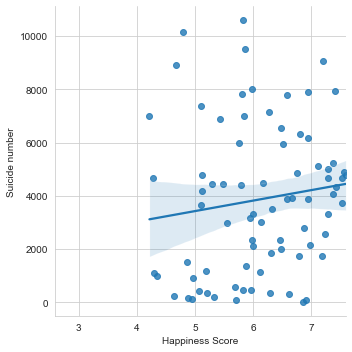

In [94]:
#The correlation between Happiness Score vs Suicide number
sns.lmplot(x = "Happiness Score",y = "Suicide number",data = combine_happy_sd)
plt.show()

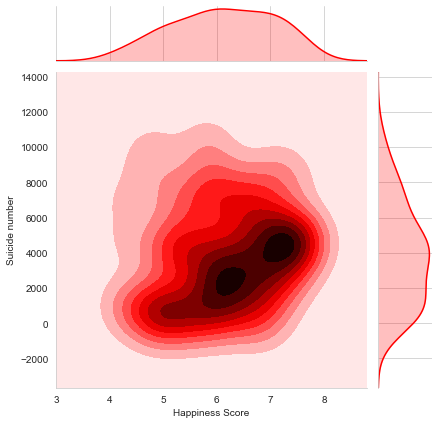

In [95]:
g = sns.jointplot(x = "Happiness Score",y = "Suicide number",data = combine_happy_sd, kind='kde',color="r")
plt.show()

## Step 10: Combine the upper five data

In [96]:
#combine 4 variables
combine_all = pd.concat([legp,perGDP,gsdcountryper,hp],axis=1)
combine_all = combine_all.loc[:,['life mean',"perGDP mean",'Suicide number',"Happiness Score"]]
combine_all = combine_all[~(combine_all == 0).any(axis=1)]
combine_all.head(20)

life mean   perGDP mean  Suicide number  \
Afghanistan                        58.19375    397.797945             NaN   
Albania                            75.15625   3235.707039          924.76   
Algeria                            73.61875   3752.577998             NaN   
Angola                             49.01875   2681.028867             NaN   
Antigua and Barbuda                75.05625  12934.599749          179.14   
Argentina                          75.15625   8500.913587         3894.59   
Armenia                            73.40000   2501.660966          976.21   
Australia                          81.81250  42967.138828         4677.41   
Austria                            81.48125  41466.162469         9076.23   
Azerbaijan                         70.73125   4017.159029          356.24   
Bahamas                            74.28750           NaN          344.28   
Bahrain                            75.72500  19353.451533          467.24   
Bangladesh                         69.30000    683.910015             NaN   
Barbados                           74.35625  14641.835239          891.13   
Belarus                            69.90625   4574.787075         7831.13   
Belgium                            80.68125  38924.190081         7900.50   
Belize                             69.26875   4174.019523         2093.49   
Benin                              57.56875    680.379437             NaN   
Bhutan                             66.16250   1766.444172             NaN   
Bolivia (Plurinational State of)   67.70625           NaN             NaN   

                                  Happiness Score  
Afghanistan                                 3.575  
Albania                                     4.959  
Algeria                                     5.605  
Angola                                      4.033  
Antigua and Barbuda                           NaN  
Argentina                                   6.574  
Armenia                                     4.350  
Australia                                   7.284  
Austria                                     7.200  
Azerbaijan                                  5.212  
Bahamas                                       NaN  
Bahrain                                     5.960  
Bangladesh                                  4.694  
Barbados                                      NaN  
Belarus                                     5.813  
Belgium                                     6.937  
Belize                                        NaN  
Benin                                       3.340  
Bhutan                                      5.253  
Bolivia (Plurinational State of)              NaN

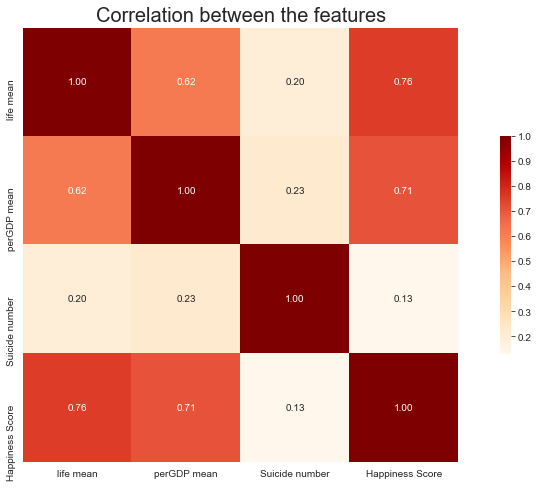

In [97]:
#Correlation between 4 variables
correlation= combine_all.corr()
plt.figure(figsize=(15,8))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True,fmt='.2f', 
                 cmap ='OrRd', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation between the features', fontsize=20)
plt.show()

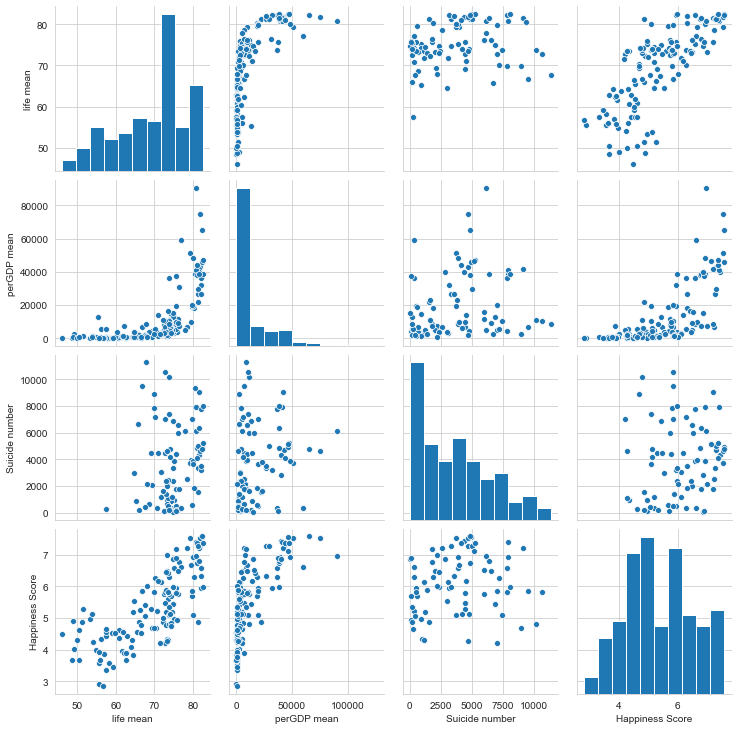

In [98]:
#Correlation between 4 variables
graph = sns.pairplot(combine_all, vars=['life mean',"perGDP mean",'Suicide number',"Happiness Score"])

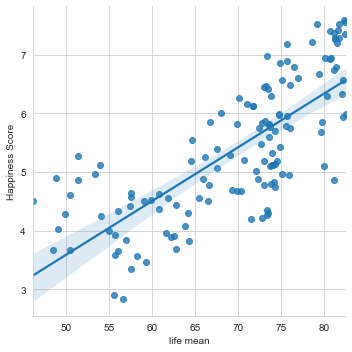

In [99]:
sns.set_style("whitegrid")
#The correlation between Happiness score vs Life expectancy
sns.lmplot(x = "life mean",y = "Happiness Score",data = combine_all)
plt.show()

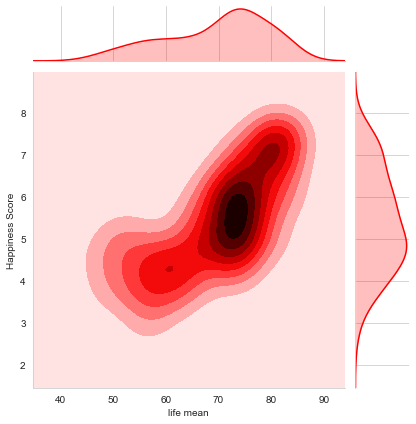

In [100]:
g = sns.jointplot(x = "life mean",y = "Happiness Score",data = combine_all, kind='kde',color="r")
plt.show()

# Conclusion
### 1. As for the age of suicide number we can see the people who age between 35-54 years old are the higher suicide rate.
### 2. As for the gender, people who is male have higher sucide rate than the female. That may because male in the real life have more presure than female.
### 3. Russian have the most suicide number in the world. Second one is the United states.
### 4. The number of suicides increases as GDP per capita increases, same as the relationship between life mean and suicides
### 5. The number of suicides increases as Happiness score increases, same as the relationship between life mean and Happiness score
### 6. The life mean and the per GDP are more corrleation with Happiness score.However the happiness socre are less corrleation with the suicide number.